## Course 3: Data Analysis

### Lec 1: Observational studies and experimental design

In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd


In [3]:
# Probability of exactly 63 successes in 31000 trials with success probability of 0.00203
stats.binom.pmf(k=63,n=31000,p=0.00203)

0.05024468664456648

### Lec 2: Hypothesis Testing

#### Binomial Test

In [4]:
from scipy.stats import binomtest

# Parameters
n = 31000
x_obs = 39 # no. of deaths in treatment
p0 = 63/31000 # control group death rate

res_binom = binomtest(x_obs, n, p0, alternative='less')

res_binom.pvalue

0.0007849845627220482

In [5]:
res_binom.statistic

0.0012580645161290322

#### Fisher's exact test

In [6]:
# Fisher's exact test for a 2x2 contingency table
from scipy.stats import fisher_exact
table = np.array([[39, 63], [30961, 30937]])
res = fisher_exact(table, alternative='less')

In [7]:
res.statistic

0.6185677526719483

In [8]:
res.pvalue

0.011094091841433758

#### Z-Test

In [9]:

from scipy import stats

# define normal dist
X = stats.norm(loc=0, scale = 1)


In [10]:
X.cdf(-3.0268)

0.0012357871459340902

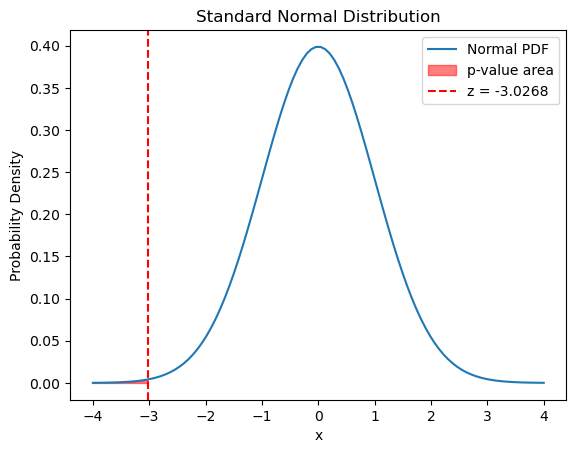

In [11]:


# Define range for x-axis
z = -3.0268
x = np.linspace(-4, 4, 100)
y = X.pdf(x)

plt.plot(x, y, label='Normal PDF')
plt.fill_between(x, 0, y, where=(x <= z), color='red', alpha=0.5, label='p-value area')
plt.axvline(z, color='red', linestyle='--', label=f'z = {z}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')
plt.legend()
plt.show()

#### t-test for sleeping drug study

In [12]:
import numpy as np
from scipy.stats import ttest_1samp

# Example data: difference in sleep hours for 10 patients
X = np.array([0.9, -0.9, 4.3, 2.9, 1.2, 3.0, 2.7, 0.6, 3.6, -0.5])

n = len(X)
mean = X.mean()
s = X.std(ddof=1)
t_stat = mean / (s / np.sqrt(n))
p_one_sided = stats.t.sf(t_stat, df=n-1)

print("t-statistic:", t_stat)
print("p-value:", p_one_sided)

t-statistic: 3.1835383022188735
p-value: 0.005560692749284678


In [13]:
# alternative to above

t_stats,p_value = stats.ttest_1samp(X, popmean=0)
p_value=p_value/2 # gives two sided p-value, so divide it by 2

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 3.1835383022188735
p-value: 0.005560692749284678


## Correlation

In [14]:
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24

In [15]:
X_mean = np.mean(Xs)

In [16]:
Y_mean = np.mean(Ys)

In [17]:
# sample std deviation
s_x = np.std(Xs, ddof=1)
print(s_x)

0.6533948258734996


In [18]:
s_y = np.std(Ys, ddof=1)
print(s_y)

348.7336574977229


In [19]:
# alt std dev
np.sqrt(np.sum((Xs-X_mean)**2)/(N-1))

0.6533948258734996

In [20]:
# sample covariance
cov_x_y = np.cov(Xs, Ys)[0][1]
print(cov_x_y)

191.20706528260865


In [21]:
# alt method for covaraince
np.sum((Xs-X_mean)*(Ys-Y_mean))/(N-1)

191.20706528260868

In [22]:
# correlation coefficient

r = np.corrcoef(Xs, Ys)[0][1]
print(r)

0.8391399162310662


In [23]:
# regression
# beta1 = r * (sy / sx)
# beta0 = Y_mean - (beta1*X_mean)
beta1 = r*(s_y/s_x)
beta0 = Y_mean - (beta1*X_mean)

print(f"beta1 = {beta1} and beta0 = {beta0}")

beta1 = 447.87059914099825 and beta0 = 13.610139085217156


## Regression

In [24]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

### Variable Transformations

In [25]:
# variable transformations 
# option 1
# x to ln (x)

Xs = np.log(Xs)
Ys = np.log(Ys)

### OLS Model Fit 

In [26]:
# add constant for intercept
Xs_ = sm.add_constant(Xs)
model = sm.OLS(Ys, Xs_).fit()

# predict values
Ys_pred = model.predict(Xs_)

# get info
print(f"Intercept (beta0): {model.params[0]}")
print(f"Slope (beta1): {model.params[1]}")
print(f"R^2: {model.rsquared}")

Intercept (beta0): 0.0013370447605032378
Slope (beta1): 1.499532577338189
R^2: 0.9999996170204596


In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.828e+07
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           1.01e-23
Time:                        15:45:04   Log-Likelihood:                 45.696
No. Observations:                   9   AIC:                            -87.39
Df Residuals:                       7   BIC:                            -87.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.001      1.748      0.1

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


### Scatter plots

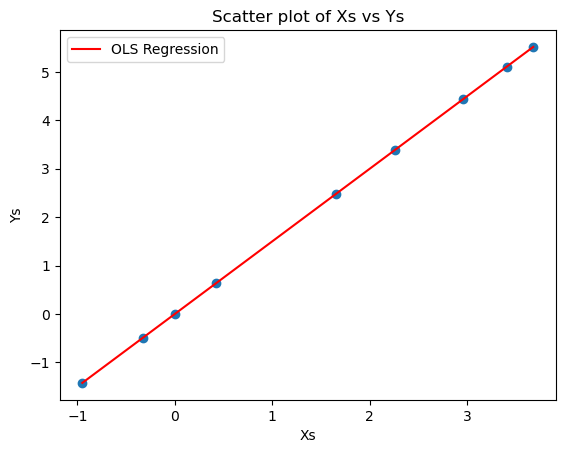

In [28]:
plt.scatter(Xs, Ys)

plt.plot(Xs, Ys_pred, color='red', label = 'OLS Regression')

plt.xlabel('Xs')
plt.ylabel('Ys')
plt.title('Scatter plot of Xs vs Ys')
plt.legend()
plt.show()

In [29]:
r = np.corrcoef(Xs, Ys)[0][1]
print(r)

0.9999998085102114


In [30]:
# residuals = obs - pred
residuals = Ys - Ys_pred
print(residuals)


[-0.00074325 -0.00110258 -0.00133704  0.00206494  0.00298404  0.00086726
 -0.00150447 -0.00058798 -0.00064092]


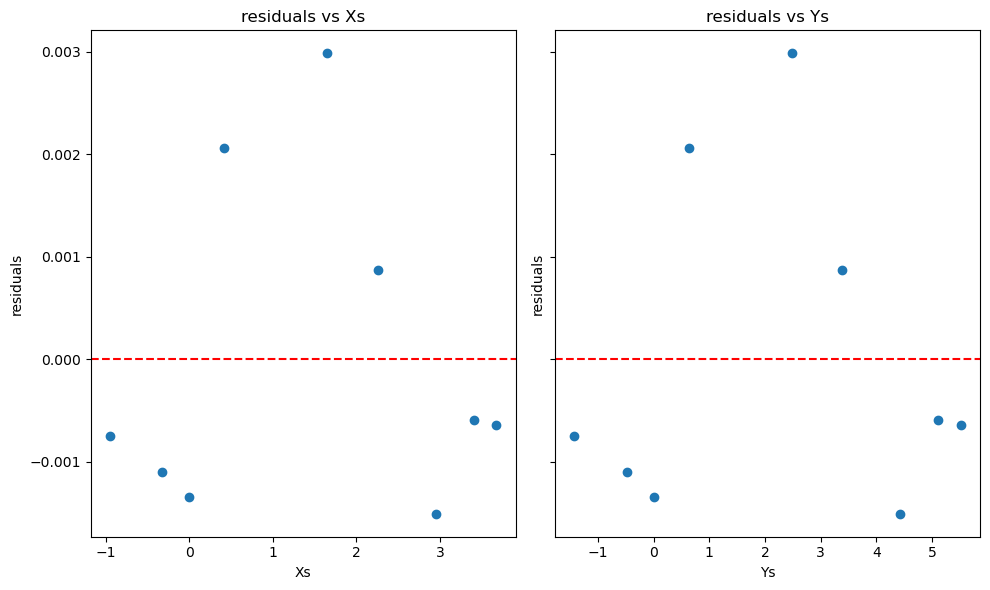

In [31]:
fig, ax = plt.subplots(1,2, figsize = (10,6), sharey = True)

ax[0].scatter(Xs, residuals)
ax[0].set_xlabel("Xs")
ax[0].set_ylabel("residuals")
ax[0].set_title("residuals vs Xs")
ax[0].axhline(0, color='red', linestyle='--')  # horizontal line at zero


ax[1].scatter(Ys, residuals)
ax[1].set_xlabel("Ys")
ax[1].set_ylabel("residuals")
ax[1].set_title("residuals vs Ys")
ax[1].axhline(0, color='red', linestyle='--')  # horizontal line at zero


plt.tight_layout()
plt.show()

### QQ Plot

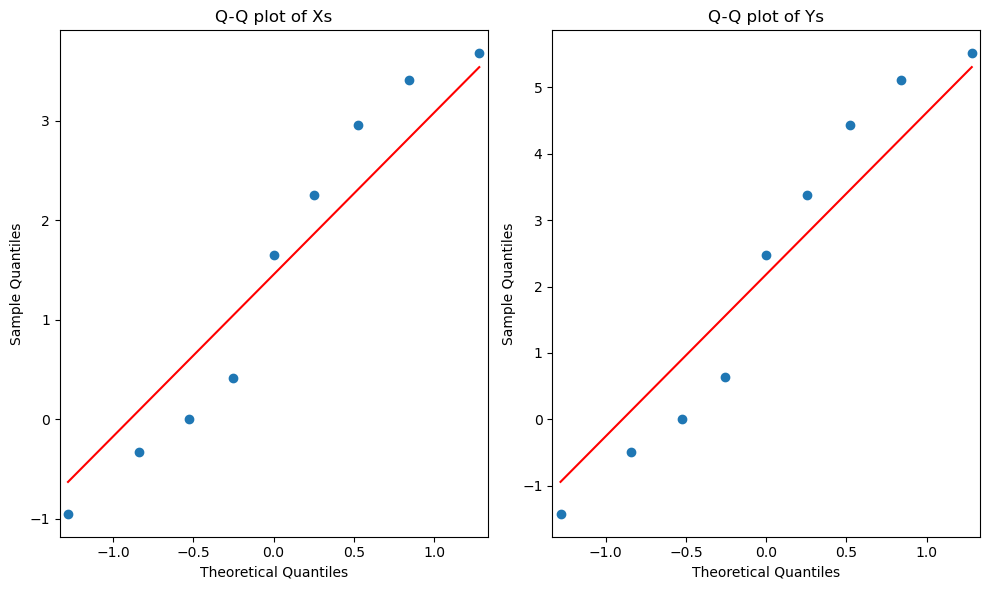

In [32]:
## QQ Plot

#fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Q-Q plot for Xs
sm.qqplot(Xs, line='s', ax=ax[0])
ax[0].set_title("Q-Q plot of Xs")

# Q-Q plot for Ys
sm.qqplot(Ys, line='s', ax=ax[1])
ax[1].set_title("Q-Q plot of Ys")

plt.tight_layout()
plt.show()

## Multiple Linear Regression

In [33]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30

In [35]:
X = pd.DataFrame({
    'Beta0': np.ones(N),
    'LogPlanetRadius': LogPlanetRadius,
    'LogPlanetOrbit': LogPlanetOrbit,
    'StarMetallicity': StarMetallicity,
    'LogStarMass': LogStarMass,
    'LogStarAge': LogStarAge
})

print(X)

    Beta0  LogPlanetRadius  LogPlanetOrbit  StarMetallicity  LogStarMass  \
0     1.0         0.324978       -2.631089            0.110     0.270027   
1     1.0         0.347130       -3.890262           -0.002     0.191446   
2     1.0         0.148420       -3.137526           -0.400    -0.163696   
3     1.0         0.457425       -2.996332            0.010     0.444686   
4     1.0         0.188966       -3.123566            0.150     0.192272   
5     1.0         0.069526       -2.339249            0.220     0.012916   
6     1.0         0.076961       -2.850767           -0.010     0.086178   
7     1.0         0.322084       -3.047657            0.020     0.138021   
8     1.0         0.429182       -2.840439           -0.060     0.494696   
9     1.0        -0.057629       -3.190045           -0.127    -0.438505   
10    1.0         0.405465       -3.146555            0.000     0.542324   
11    1.0         0.192272       -3.137296            0.120     0.024693   
12    1.0   

In [39]:
# closed form solution
# 𝜷 =(𝑋⊺𝑋)−1𝑋⊺𝑦.
y = LogPlanetMass
Beta = np.linalg.inv(np.transpose(X)@X) @ np.transpose(X) @ y

print([f"{b:.3g}" for b in Beta])

['0.154', '1.4', '-0.141', '-1.6', '-0.956', '-0.462']


In [41]:
#scipy approach
# X = sm.add_constant(X) -- if intercept ones not already included

model = sm.OLS(y, X).fit()
betas = model.params

print(betas)
print([f"{b:.3g}" for b in betas])


Beta0              0.153793
LogPlanetRadius    1.402145
LogPlanetOrbit    -0.140998
StarMetallicity   -1.599514
LogStarMass       -0.956109
LogStarAge        -0.461762
dtype: float64
['0.154', '1.4', '-0.141', '-1.6', '-0.956', '-0.462']


In [43]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     9.264
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           5.14e-05
Time:                        16:07:03   Log-Likelihood:                -42.078
No. Observations:                  30   AIC:                             96.16
Df Residuals:                      24   BIC:                             104.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Beta0               0.1538      1.389     